In [1]:
from io import StringIO
from rdkit import Chem



In [2]:
import stk
import pymongo
client = "mongodb://localhost:27017/"
client = pymongo.MongoClient(client)
inchikey_photo_cat_Z = "JZSFSTBFNOWLCA-KRYSQPQISA-N"
inchikey_photo_cat_E = "JZSFSTBFNOWLCA-BSRQYYOTSA-N"

In [3]:
sio = StringIO()
w = Chem.SDWriter(sio)
db_mol_list = ["constructed_photocat_Z","constructed_photocat_E","constructed_photocat_Z_ON","constructed_photocat_E_ON"]
for db_mol in db_mol_list:
    db_polymer = stk.ConstructedMoleculeMongoDb(
        client,
        database=db_mol,
    )
    if '_E' in db_mol:
        constructed_molecule= db_polymer.get(
            {"InChIKey": inchikey_photo_cat_E}
        )
    else:
        constructed_molecule = db_polymer.get(
            {"InChIKey": inchikey_photo_cat_Z}
        )
    mol = constructed_molecule.to_rdkit_mol()
    mol = Chem.Mol(mol)
    mol.SetProp('_Name',db_mol)
    w.write(mol)

    
w.flush()
multimol_sdf = sio.getvalue()

In [4]:
# write to file
with open(f'{inchikey_photo_cat_Z}.sdf', 'w') as f:
    f.write(multimol_sdf)

In [5]:
stk.InchiKey().get_key(constructed_molecule)

'JZSFSTBFNOWLCA-BSRQYYOTSA-N'

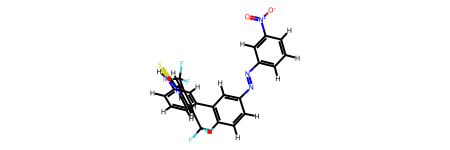

0.45235044726052925
V_bur (%): 45.2
0.6117044819232202
V_bur (%): 61.2
[9.148761878377858, 9.693195725874167, 11.234098291571774, 11.530944177170651]


In [6]:
from morfeus import BuriedVolume, read_xyz
import os
from photocat_database.calculators.Optimise_ON import ETKDG_constaint
import numpy as np
import itertools    
db_mol = "constructed_photocat_E_ON"
db_polymer = stk.ConstructedMoleculeMongoDb(
    client,
    database=db_mol,
)
constructed_molecule_E_ON = db_polymer.get(
    {"InChIKey": inchikey_photo_cat_E}
)
mol = constructed_molecule_E_ON.to_rdkit_mol()
display(mol)
xyz_file = client.constructed_photocat_E_ON.XTB_opt.find_one({"InChIKey": inchikey_photo_cat_E})['cal_folder']+ "/xtbopt.xyz"
constructed_molecule_E_ON.write("constructed_photocat_E_ON.xyz")
elements, coordinates = read_xyz("constructed_photocat_E_ON.xyz")
elements, coordinates = read_xyz(xyz_file)
calculator = ETKDG_constaint()
oxygen_id, hydrogen_id = calculator.get_atom_position_to_induce_constain_for_3bb(constructed_molecule_E_ON)
bv = BuriedVolume(elements, coordinates, hydrogen_id[0]+1, excluded_atoms=[2, 3, 4, 5, 6, 7])
print(bv.fraction_buried_volume)
bv.print_report()
bv = BuriedVolume(elements, coordinates, hydrogen_id[1]+1, excluded_atoms=[2, 3, 4, 5, 6, 7])
print(bv.fraction_buried_volume)
bv.print_report()
distances = [ np.linalg.norm(coordinates[oxygen_i] - coordinates[hydrogen_i]) for oxygen_i, hydrogen_i in itertools.product(oxygen_id, hydrogen_id)]
print(distances)

In [7]:
from photocat_database.calculators import Optimize_Constructed
import importlib
importlib.reload(Optimize_Constructed)
calculator = Optimize_Constructed.ETKDG_isomer(isomers="E")
atoms_list_dihedral, mol = calculator.get_NNdoublebond_atoms(constructed_molecule_E_ON)
print(" ,".join(str(e) for e in atoms_list_dihedral) )
atoms_list_dihedral = " ,".join(str(e) for e in atoms_list_dihedral) 
string = (f"$constrain \n"
            f"dihedral: {atoms_list_dihedral} "
            "\n$end")

print(string)


[44, 26, 27, 45]
44 ,26 ,27 ,45
$constrain 
dihedral: 44 ,26 ,27 ,45 
$end


In [8]:
db_polymer = stk.ConstructedMoleculeMongoDb(
    client,
    database=db_mol,
)
constructed_molecule_E = db_polymer.get(
    {"InChIKey": inchikey_photo_cat_E}
)
constructed_molecule_E._atom_infos[10].get_atom().get_id()

10

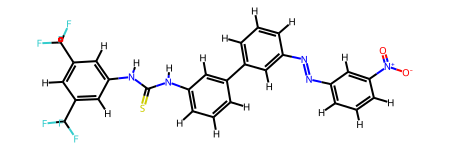

0.438647269847186
V_bur (%): 43.9
0.4388452758106597
V_bur (%): 43.9
[13.157184924687538, 15.138502863235486, 14.426525740102292, 16.43911705914128]


In [9]:
from morfeus import BuriedVolume, read_xyz
import os
from photocat_database.calculators.Optimise_ON import ETKDG_constaint
db_mol = "constructed_photocat_E"
db_polymer = stk.ConstructedMoleculeMongoDb(
    client,
    database=db_mol,
)
constructed_molecule_E = db_polymer.get(
    {"InChIKey": inchikey_photo_cat_E}
)
mol = constructed_molecule_E.to_rdkit_mol()
display(mol)
xyz_file = client.constructed_photocat_E.XTB_opt.find_one({"InChIKey": inchikey_photo_cat_E})['cal_folder']+ "/xtbopt.xyz"
#constructed_molecule_E.with_structure_from_file(xyz_file)
constructed_molecule_E.write("constructed_photocat_E.xyz")
elements, coordinates = read_xyz("constructed_photocat_E.xyz")
calculator = ETKDG_constaint()
oxygen_id, hydrogen_id = calculator.get_atom_position_to_induce_constain_for_3bb(constructed_molecule_E)
bv = BuriedVolume(elements, coordinates, hydrogen_id[0]+1, excluded_atoms=[2, 3, 4, 5, 6, 7])
print(bv.fraction_buried_volume)
bv.print_report()
bv = BuriedVolume(elements, coordinates, hydrogen_id[1]+1, excluded_atoms=[2, 3, 4, 5, 6, 7])
print(bv.fraction_buried_volume)
bv.print_report()
import itertools
import numpy as np

distances = [ np.linalg.norm(coordinates[oxygen_i] - coordinates[hydrogen_i]) for oxygen_i, hydrogen_i in itertools.product(oxygen_id, hydrogen_id)]
print(distances)

In [10]:
constructed_molecule_E.write("constructed_photocat_E.xyz")
constructed_molecule_E.to_rdkit_mol().GetAtomWithIdx(16).GetSymbol()

'H'

In [11]:
print(hydrogen_id, oxygen_id)
elements[16]

[15, 16] [17, 18]


'H'

In [12]:
toz = [1,5,6,3]
toz.sort()
toz

[1, 3, 5, 6]